# Arenstorf Orbit

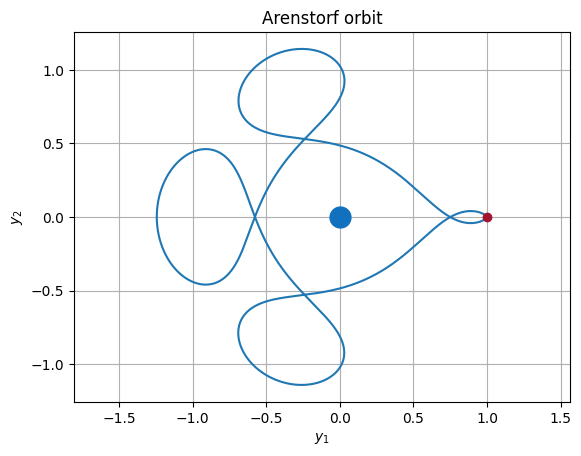

In [26]:

import matplotlib.pyplot as plt
import numpy as np
from explicit_integration import *

# ODE definieren
def dydt(t, y):

    mu = 0.012277471      # Mond-Masse
    mup = 1 - mu          # Erd-Masse
    
    y1 = y[0]
    y2 = y[2]
    
    A = ((y1 + mu)**2 + y2**2)**1.5
    B = ((y1 - mup)**2 + y2**2)**1.5
    
    f = np.zeros(4)
    f[0] = y[1]
    f[1] = y1 + 2*y[3] - mup*(y1 + mu)/A - mu*(y1 - mup)/B
    f[2] = y[3]
    f[3] = y2 - 2*y[1] - mup*y2/A - mu*y2/B
    
    return f

# Integrationsintervall
t_span = (0, 17.0652165601579625588917206249)

# Anfangswert
y0 = [0.994, 0, 0, -2.00158510637908252240537862224]

t, y = Runge_Kutta_4(dydt, t_span, y0, 20000)

plt.plot(y[:,0], y[:,2])
plt.plot(0, 0, 'o', markersize=15, color=[0.0667,0.4431,0.7451]) 
plt.plot(1, 0, 'o', markersize=6, color=[0.6353,0.0784,0.1843]) 
plt.axis('equal')
plt.grid()
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.title('Arenstorf orbit')
plt.show()